In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
diversity_metrics = pd.read_csv('all_diversity_imagenet.csv')

In [3]:
def ensure_unique_folders(df, threshold):
    """
    Ensures uniqueness of the "Folder" field in the dataframe.
    
    Args:
    - df (pd.DataFrame): The dataframe to process.
    - threshold (int): The maximum allowable value for "Count".
    
    Returns:
    - pd.DataFrame: A dataframe where the "Folder" field is unique, and 
                    the chosen row for each folder has the largest "Count" 
                    below the threshold.
    """

    # Filter rows where Count is less than the threshold
    df = df[df['Count'] <= threshold]

    # Sort by Folder and Count, then drop duplicates on Folder while keeping the last (highest Count)
    df = df.sort_values(by=['Folder', 'Count']).drop_duplicates(
        subset='Folder', keep='last')

    return df

In [4]:
diversity_metrics_extracted = ensure_unique_folders(diversity_metrics, 1000)
diversity_metrics_extracted

,Folder,Count,Vendi (clip-L-14-padding),Dissimilarity (clip-L-14-padding),Std (clip-L-14-padding),Vendi (clip-L-14-crop),Dissimilarity (clip-L-14-crop),Std (clip-L-14-crop),Vendi (convnextv2-l-resize),Dissimilarity (convnextv2-l-resize),...,Std (dinov2-l-fb-padding),Vendi (vgg19-gram-resize),Dissimilarity (vgg19-gram-resize),Std (vgg19-gram-resize),Vendi (convnextv2-l-padding),Dissimilarity (convnextv2-l-padding),Std (convnextv2-l-padding),Vendi (convnextv2-l-crop),Dissimilarity (convnextv2-l-crop),Std (convnextv2-l-crop)
403,.,1000,23.035013,0.518257,15.429100,22.412939,0.515380,15.612600,94.823402,0.972810,...,45.742165,9.957637,0.362259,19.341356,87.351578,0.959458,16.949030,91.494446,0.972891,16.885857
283,n01440764,1000,7.657352,0.311200,12.104499,8.024404,0.320419,12.384300,2.616437,0.154039,...,31.334209,3.768274,0.196686,16.487091,2.425414,0.143436,6.494077,2.539255,0.150589,6.576511
35,n01443537,1000,6.133996,0.273226,11.560910,6.134802,0.270573,11.689047,2.669250,0.138095,...,29.343067,4.945237,0.239929,19.511002,2.548628,0.130657,6.175697,2.516234,0.129641,6.148380
367,n01484850,1000,5.756010,0.269960,11.077001,5.654590,0.265509,11.207691,3.304400,0.202087,...,34.928631,6.245957,0.292323,10.649731,3.526333,0.208050,8.178746,3.301923,0.201778,7.902090
23,n01491361,1000,6.133330,0.281684,11.202733,6.202636,0.282465,11.398506,5.571235,0.283014,...,32.699497,5.050464,0.242152,7.963357,5.477477,0.281536,9.725225,5.664087,0.285939,9.682240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,n02028035,1000,4.874029,0.232147,10.139008,4.506949,0.218046,9.881511,1.846099,0.090430,...,25.055157,4.054381,0.206938,14.031037,1.867415,0.097412,5.437153,1.821721,0.090764,5.113665
139,n02037110,1000,5.291881,0.248749,10.552201,5.129820,0.243094,10.525393,1.627199,0.065367,...,24.484003,4.034952,0.207480,16.432562,1.644432,0.071379,4.705319,1.553951,0.059146,4.079301
67,n02051845,1000,6.889328,0.298319,11.776696,6.701674,0.293470,11.810459,3.657625,0.192565,...,23.820063,4.972130,0.241298,19.127432,3.541094,0.193480,8.355864,3.585620,0.189490,7.853908
47,n02058221,1000,6.927155,0.303151,11.596196,6.866452,0.299464,11.690804,3.026138,0.168800,...,28.753481,5.217921,0.257301,13.432553,3.000996,0.172026,7.348116,2.998631,0.167977,6.930099


In [5]:
diversity_metrics_extracted[diversity_metrics_extracted['Folder']=='.']

,Folder,Count,Vendi (clip-L-14-padding),Dissimilarity (clip-L-14-padding),Std (clip-L-14-padding),Vendi (clip-L-14-crop),Dissimilarity (clip-L-14-crop),Std (clip-L-14-crop),Vendi (convnextv2-l-resize),Dissimilarity (convnextv2-l-resize),...,Std (dinov2-l-fb-padding),Vendi (vgg19-gram-resize),Dissimilarity (vgg19-gram-resize),Std (vgg19-gram-resize),Vendi (convnextv2-l-padding),Dissimilarity (convnextv2-l-padding),Std (convnextv2-l-padding),Vendi (convnextv2-l-crop),Dissimilarity (convnextv2-l-crop),Std (convnextv2-l-crop)
403,.,1000,23.035013,0.518257,15.4291,22.412939,0.51538,15.6126,94.823402,0.97281,...,45.742165,9.957637,0.362259,19.341356,87.351578,0.959458,16.94903,91.494446,0.972891,16.885857


In [6]:
for row in diversity_metrics_extracted.head():
    print(row)

Folder
Count
Vendi (clip-L-14-padding)
Dissimilarity (clip-L-14-padding)
Std (clip-L-14-padding)
Vendi (clip-L-14-crop)
Dissimilarity (clip-L-14-crop)
Std (clip-L-14-crop)
Vendi (convnextv2-l-resize)
Dissimilarity (convnextv2-l-resize)
Std (convnextv2-l-resize)
Vendi (clip-L-14-resize)
Dissimilarity (clip-L-14-resize)
Std (clip-L-14-resize)
Vendi (dinov2-l-fb-resize)
Dissimilarity (dinov2-l-fb-resize)
Std (dinov2-l-fb-resize)
Vendi (dinov2-l-fb-crop)
Dissimilarity (dinov2-l-fb-crop)
Std (dinov2-l-fb-crop)
Vendi (dinov2-l-fb-padding)
Dissimilarity (dinov2-l-fb-padding)
Std (dinov2-l-fb-padding)
Vendi (vgg19-gram-resize)
Dissimilarity (vgg19-gram-resize)
Std (vgg19-gram-resize)
Vendi (convnextv2-l-padding)
Dissimilarity (convnextv2-l-padding)
Std (convnextv2-l-padding)
Vendi (convnextv2-l-crop)
Dissimilarity (convnextv2-l-crop)
Std (convnextv2-l-crop)


In [7]:
diversity_metrics_extracted.head()

,Folder,Count,Vendi (clip-L-14-padding),Dissimilarity (clip-L-14-padding),Std (clip-L-14-padding),Vendi (clip-L-14-crop),Dissimilarity (clip-L-14-crop),Std (clip-L-14-crop),Vendi (convnextv2-l-resize),Dissimilarity (convnextv2-l-resize),...,Std (dinov2-l-fb-padding),Vendi (vgg19-gram-resize),Dissimilarity (vgg19-gram-resize),Std (vgg19-gram-resize),Vendi (convnextv2-l-padding),Dissimilarity (convnextv2-l-padding),Std (convnextv2-l-padding),Vendi (convnextv2-l-crop),Dissimilarity (convnextv2-l-crop),Std (convnextv2-l-crop)
403,.,1000,23.035013,0.518257,15.429100,22.412939,0.515380,15.612600,94.823402,0.972810,...,45.742165,9.957637,0.362259,19.341356,87.351578,0.959458,16.949030,91.494446,0.972891,16.885857
283,n01440764,1000,7.657352,0.311200,12.104499,8.024404,0.320419,12.384300,2.616437,0.154039,...,31.334209,3.768274,0.196686,16.487091,2.425414,0.143436,6.494077,2.539255,0.150589,6.576511
35,n01443537,1000,6.133996,0.273226,11.560910,6.134802,0.270573,11.689047,2.669250,0.138095,...,29.343067,4.945237,0.239929,19.511002,2.548628,0.130657,6.175697,2.516234,0.129641,6.148380
367,n01484850,1000,5.756010,0.269960,11.077001,5.654590,0.265509,11.207691,3.304400,0.202087,...,34.928631,6.245957,0.292323,10.649731,3.526333,0.208050,8.178746,3.301923,0.201778,7.902090
23,n01491361,1000,6.133330,0.281684,11.202733,6.202636,0.282465,11.398506,5.571235,0.283014,...,32.699497,5.050464,0.242152,7.963357,5.477477,0.281536,9.725225,5.664087,0.285939,9.682240


In [8]:
metrics_avg = {}

for col in diversity_metrics_extracted.columns:
    if col not in 'Folder':
        metrics_avg[col] = {}

In [9]:
metrics_avg

{'Count': {},
 'Vendi (clip-L-14-padding)': {},
 'Dissimilarity (clip-L-14-padding)': {},
 'Std (clip-L-14-padding)': {},
 'Vendi (clip-L-14-crop)': {},
 'Dissimilarity (clip-L-14-crop)': {},
 'Std (clip-L-14-crop)': {},
 'Vendi (convnextv2-l-resize)': {},
 'Dissimilarity (convnextv2-l-resize)': {},
 'Std (convnextv2-l-resize)': {},
 'Vendi (clip-L-14-resize)': {},
 'Dissimilarity (clip-L-14-resize)': {},
 'Std (clip-L-14-resize)': {},
 'Vendi (dinov2-l-fb-resize)': {},
 'Dissimilarity (dinov2-l-fb-resize)': {},
 'Std (dinov2-l-fb-resize)': {},
 'Vendi (dinov2-l-fb-crop)': {},
 'Dissimilarity (dinov2-l-fb-crop)': {},
 'Std (dinov2-l-fb-crop)': {},
 'Vendi (dinov2-l-fb-padding)': {},
 'Dissimilarity (dinov2-l-fb-padding)': {},
 'Std (dinov2-l-fb-padding)': {},
 'Vendi (vgg19-gram-resize)': {},
 'Dissimilarity (vgg19-gram-resize)': {},
 'Std (vgg19-gram-resize)': {},
 'Vendi (convnextv2-l-padding)': {},
 'Dissimilarity (convnextv2-l-padding)': {},
 'Std (convnextv2-l-padding)': {},
 'Ven

In [10]:
import os
from tqdm import tqdm

common_ref = diversity_metrics_extracted[diversity_metrics_extracted['Folder'] == "."].iloc[0]
print(common_ref)

for index, row in tqdm(diversity_metrics_extracted.iterrows()):
    folder_path = row['Folder']
    if folder_path == '.':
        continue  # Skip the root directory

    parts = folder_path.split(os.path.sep)

    if len(parts) == 2:
        types = ['all_artists', parts[0]]
        reference_rows = [common_ref,
                          diversity_metrics_extracted[
            diversity_metrics_extracted['Folder'] == parts[0]].iloc[0]]
    else:
        types = ['all_classes']
        reference_rows = [common_ref]

    for col in diversity_metrics_extracted.columns[1:]:
        for type_, reference_row in zip(types, reference_rows):
            if reference_row[col] == 0:  # Check to avoid division by zero
                ratio = 0
            else:
                ratio = row[col] / reference_row[col]
            # Storing the ratio and the name of the row
            if type_ not in metrics_avg[col]:
                metrics_avg[col][type_] = []
            metrics_avg[col][type_].append((folder_path, ratio))

Folder                                           .
Count                                         1000
Vendi (clip-L-14-padding)                23.035013
Dissimilarity (clip-L-14-padding)         0.518257
Std (clip-L-14-padding)                    15.4291
Vendi (clip-L-14-crop)                   22.412939
Dissimilarity (clip-L-14-crop)             0.51538
Std (clip-L-14-crop)                       15.6126
Vendi (convnextv2-l-resize)              94.823402
Dissimilarity (convnextv2-l-resize)        0.97281
Std (convnextv2-l-resize)                16.910219
Vendi (clip-L-14-resize)                 22.457458
Dissimilarity (clip-L-14-resize)           0.51538
Std (clip-L-14-resize)                   15.613958
Vendi (dinov2-l-fb-resize)              165.133896
Dissimilarity (dinov2-l-fb-resize)         0.95186
Std (dinov2-l-fb-resize)                   45.6791
Vendi (dinov2-l-fb-crop)                165.913391
Dissimilarity (dinov2-l-fb-crop)          0.951661
Std (dinov2-l-fb-crop)         

101it [00:00, 2745.35it/s]


In [11]:
sorted(metrics_avg['Std (vgg19-gram-resize)']['all_classes'], key=lambda x: x[1])

[('n01491361', 0.4117269160187412),
 ('n01601694', 0.4947085141563369),
 ('n01496331', 0.5210243321764803),
 ('n01795545', 0.5274480173002337),
 ('n01494475', 0.5413811391437512),
 ('n02018795', 0.5417011449502048),
 ('n01484850', 0.55061964267629),
 ('n01798484', 0.5686053989170687),
 ('n01665541', 0.587434757521887),
 ('n01632777', 0.5965770127748882),
 ('n01955084', 0.6088812606867887),
 ('n01796340', 0.6210585910415533),
 ('n01930112', 0.6487734113338858),
 ('n01695060', 0.6511196603776896),
 ('n01498041', 0.6559800998792854),
 ('n01776313', 0.6650862127199398),
 ('n01675722', 0.6741409471244889),
 ('n01685808', 0.6803113395166936),
 ('n01664065', 0.6819907536565717),
 ('n02018207', 0.6829722198472433),
 ('n01753488', 0.6852485015198057),
 ('n01910747', 0.6866329087659995),
 ('n01770081', 0.6910726071972609),
 ('n02058221', 0.6944990360872866),
 ('n01774384', 0.6980729930779146),
 ('n01773549', 0.7158801081728102),
 ('n01667114', 0.7172315779954738),
 ('n01622779', 0.71822339876539

In [12]:
sorted(metrics_avg['Std (clip-L-14-padding)']['all_classes'], key=lambda x: x[1])

[('n01773157', 0.5933968015989532),
 ('n01592084', 0.6223043376354815),
 ('n02007558', 0.6275706205190763),
 ('n01735189', 0.6321741754408173),
 ('n01695060', 0.6405516082247988),
 ('n01773797', 0.6405630430945007),
 ('n01860187', 0.6424387943963451),
 ('n01531178', 0.6514398911548748),
 ('n01632458', 0.6530292144232154),
 ('n01622779', 0.6536301322785727),
 ('n02028035', 0.6571353834179803),
 ('n01774384', 0.6591563884700911),
 ('n02027492', 0.6634876698727157),
 ('n01806143', 0.6642905831561032),
 ('n02018207', 0.6656994827235808),
 ('n01537544', 0.6664439236462227),
 ('n01820546', 0.6671183337182043),
 ('n01843383', 0.6686705091125403),
 ('n01770081', 0.6759865387477668),
 ('n01729977', 0.6824252357313841),
 ('n01698640', 0.6828776239008308),
 ('n02037110', 0.6839155392091173),
 ('n01755581', 0.6868258062633912),
 ('n01774750', 0.6895117026310832),
 ('n01950731', 0.6925057841897659),
 ('n01614925', 0.6948108066812276),
 ('n01819313', 0.6973833433136053),
 ('n02013706', 0.69854234462

In [13]:
sorted(metrics_avg['Vendi (clip-L-14-padding)']['all_classes'], key=lambda x: x[1])

[('n01773157', 0.15070883609074157),
 ('n02007558', 0.1659470400756613),
 ('n01773797', 0.1719336976683163),
 ('n01695060', 0.18019900834488353),
 ('n01592084', 0.18023709733417648),
 ('n01860187', 0.18311136698815705),
 ('n01735189', 0.1887235104534817),
 ('n01531178', 0.19080165812962693),
 ('n01774384', 0.19081198769791888),
 ('n01806143', 0.19196705699876485),
 ('n01820546', 0.19840786368712515),
 ('n01622779', 0.19938302461517493),
 ('n01843383', 0.202845003233838),
 ('n01632458', 0.20394904570935402),
 ('n01729977', 0.20402135268739763),
 ('n01698640', 0.20755901247174274),
 ('n01537544', 0.20859012695308538),
 ('n02018207', 0.2115735298416053),
 ('n02028035', 0.2115922017265739),
 ('n01774750', 0.21425780996094967),
 ('n02027492', 0.2161890045202522),
 ('n01770081', 0.21707018500732922),
 ('n01755581', 0.21878640448304093),
 ('n01614925', 0.21950316059949088),
 ('n01819313', 0.2216945609171696),
 ('n01910747', 0.22417249807712705),
 ('n01818515', 0.2246293175421904),
 ('n0184700

In [14]:
sorted(metrics_avg['Vendi (vgg19-gram-resize)']['all_classes'], key=lambda x: x[1])

[('n02027492', 0.3756485399047),
 ('n01440764', 0.3784305585710798),
 ('n02037110', 0.40521182197034306),
 ('n02028035', 0.4071630084991973),
 ('n01820546', 0.4164202982012173),
 ('n01798484', 0.4179271451678755),
 ('n01773157', 0.4182514330776924),
 ('n01560419', 0.4215503873593224),
 ('n01531178', 0.42526681683259204),
 ('n01860187', 0.4273819191197604),
 ('n01592084', 0.4278968434987122),
 ('n01695060', 0.4334152449221312),
 ('n01847000', 0.43392083141826926),
 ('n02007558', 0.43754541443391504),
 ('n01828970', 0.4401418726084844),
 ('n01601694', 0.4440194404185134),
 ('n01818515', 0.4520446563414903),
 ('n01622779', 0.4521108355930212),
 ('n01514668', 0.46437238557238686),
 ('n02002556', 0.46833274927669716),
 ('n01729977', 0.46931207769424976),
 ('n01877812', 0.4708296033679205),
 ('n02018795', 0.4757394142647796),
 ('n02018207', 0.4779874975805307),
 ('n01984695', 0.48547801196762214),
 ('n01833805', 0.49135206700979633),
 ('n01735189', 0.49386199413695886),
 ('n01978287', 0.4941

In [15]:
sorted(metrics_avg['Std (clip-L-14-resize)']['all_classes'], key=lambda x: x[1])

[('n01773157', 0.5946782339228734),
 ('n01592084', 0.6220292880308117),
 ('n01735189', 0.627582101169882),
 ('n02007558', 0.6289432925684423),
 ('n01773797', 0.6391943110188585),
 ('n01695060', 0.6404261385395514),
 ('n01531178', 0.6441764694313401),
 ('n01860187', 0.6447760752807373),
 ('n01622779', 0.6497857189363918),
 ('n01632458', 0.6504473803570419),
 ('n01774384', 0.6519451428750126),
 ('n02028035', 0.6533886678464554),
 ('n02027492', 0.6564810020166839),
 ('n01537544', 0.6637761963379639),
 ('n01843383', 0.6638262194805385),
 ('n01820546', 0.6652147739656357),
 ('n01806143', 0.6655185775201737),
 ('n02018207', 0.6660941185122151),
 ('n01729977', 0.6701010394186028),
 ('n01770081', 0.6702272272239257),
 ('n01774750', 0.6766551705056222),
 ('n01819313', 0.6809536182245974),
 ('n01755581', 0.6847271588772876),
 ('n01698640', 0.6851977673187265),
 ('n01614925', 0.6886365987878885),
 ('n02037110', 0.6888084731751966),
 ('n01775062', 0.6959118815774478),
 ('n01818515', 0.698878577647

In [16]:
# Convert the nested dictionary structure to a flat dataframe
df_list = []

for metric, categories in metrics_avg.items():
    for category, values in categories.items():
        labels, value_list = zip(*values)
        temp_df = pd.DataFrame({
            'Metric': [metric] * len(labels),
            'Category': category,
            'Value': value_list
        })
        df_list.append(temp_df)

full_df = pd.concat(df_list, ignore_index=True)


In [17]:
full_df

,Metric,Category,Value
0,Count,all_classes,1.000000
1,Count,all_classes,1.000000
2,Count,all_classes,1.000000
3,Count,all_classes,1.000000
4,Count,all_classes,1.000000
...,...,...,...
3095,Std (convnextv2-l-crop),all_classes,0.302837
3096,Std (convnextv2-l-crop),all_classes,0.241581
3097,Std (convnextv2-l-crop),all_classes,0.465118
3098,Std (convnextv2-l-crop),all_classes,0.410408


In [18]:
# Remove rows with Metric equal to 'count'
full_df = full_df[full_df['Metric'] != 'Count']

# Sort the dataframe by Metric
full_df = full_df.sort_values(by='Metric')

In [19]:
len(diversity_metrics.columns)-1

31

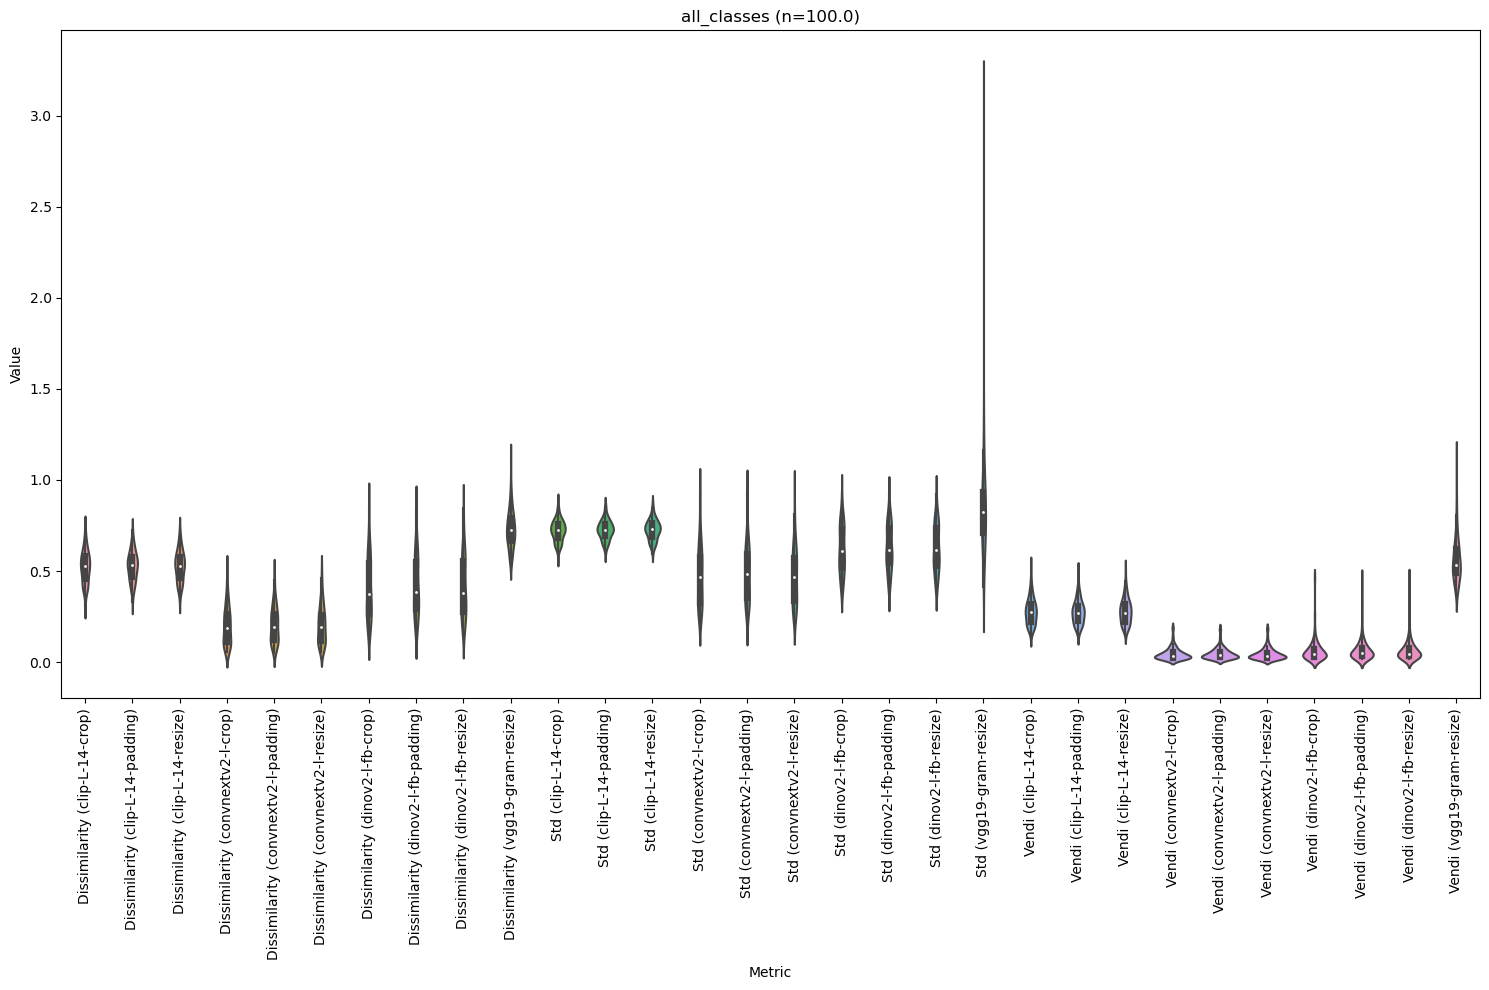

In [20]:
categories = full_df['Category'].unique()

for category in categories:
    plt.figure(figsize=(15, 10))

    filtered_df = full_df[full_df['Category'] == category]
    count_values = filtered_df.shape[0]/(len(diversity_metrics.columns)-2)

    sns.violinplot(x='Metric', y='Value', data=filtered_df)
    plt.title(f"{category} (n={count_values})")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.savefig(f'figures/imagenet/{category}.png')

In [82]:
metrics_avg['Vendi (clip-L-14)']['Minimalism']

[('Minimalism/agnes-martin', 0.24825222260596153),
 ('Minimalism/brice-marden', 0.29154747523839586)]